In [3]:
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler
import os

In [4]:
def read_data(file):
    with open(file, 'r') as f:
        data = f.read()
    bs_data = bs(data, 'xml') 
    return bs_data

def calc(b_name, i):
    a1 = b_name[i].find_all('component')[0].get('data')
    b1 = b_name[i].find_all('component')[1].get('data')
    c1 = b_name[i].find_all('component')[2].get('data')
    x = np.asarray([float(x) for x in a1.split(',')])
    y = np.asarray([float(y) for y in b1.split(',')])
    z = np.asarray([float(z) for z in c1.split(',')])
    r = (x**2 + y**2 + z**2)**0.5
    return r

def values_df(bs_data, low, high):
    b_name = bs_data.find_all('name')
    
    Attributes = []
    for i in range(len(b_name)):
        Attributes.append(b_name[i].get('value'))
    
    Attributes = list(set(Attributes))
    
    Collection = {}
    for i in range(low, high):
        r = calc(b_name, i)
        v = b_name[i].get('value')
        Collection[v] = r
    
    df = pd.DataFrame(Collection)
    return df

def get_mean_values(attribute):
    mean_list = []
    for i in range(len(os.listdir("../Timeseries"))):
        if os.listdir("../Timeseries")[i].startswith("timeseries"):
            try:
                bs_data = read_data(os.listdir("../Timeseries")[i])
                df = values_df(bs_data,0,32)
                k = df.mean()[attribute]
                mean_list.append(k)
            except:
                print(os.listdir("../Timeseries")[i] + " failed to compute")
        else:
            continue
        
    return mean_list


In [82]:
mean_lpa = []
for i in range(len(os.listdir("../Timeseries"))):
    if os.listdir("../Timeseries")[i].startswith("timeseries"):
        try:
            bs_data = read_data(os.listdir("../Timeseries")[i])
            df = values_df(bs_data,0,32)
            k = df.mean()['Left Pelvic Angles']
            mean_lpa.append(k)
        except:
            print(os.listdir("../Timeseries")[i] + " failed to compute")
    else:
        continue

timeseries-10.xml failed to compute
timeseries-44.1.xml failed to compute
timeseries-6.xml failed to compute


timeseries-10.xml failed to compute
timeseries-44.1.xml failed to compute
timeseries-6.xml failed to compute
timeseries-10.xml failed to compute
timeseries-44.1.xml failed to compute
timeseries-6.xml failed to compute


Text(0.5, 1.0, 'Left Knee Angles')

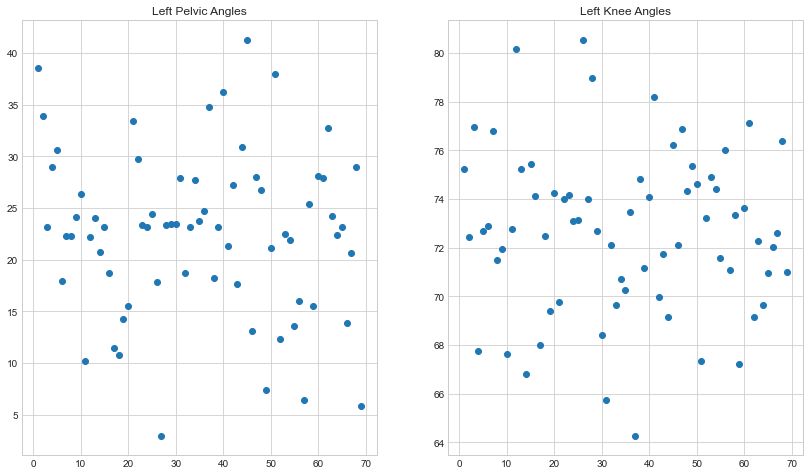

In [96]:
fig,ax = plt.subplots(1,2,figsize = (14,8))
ax[0].scatter(np.arange(1,70),get_mean_values("Left Pelvic Angles"))
ax[0].set_title("Left Pelvic Angles")

ax[1].scatter(np.arange(1,70),get_mean_values("Left Knee Angles"))
ax[1].set_title("Left Knee Angles")